# Feature Effect Evaluation

<script>
    document.querySelector('head').innerHTML += '<style>.slides { zoom: 0.975 !important; }</style>';
</script>

<style>
/* Ensure the entire cell and its output take full width */
.reveal .slides > section .cell {
    width: 90% !important;
    margin: 0 auto;
}

.reveal .slides > section .output {
    width: 90% !important;
    max-width: 90% !important;
    height: 90% !important;
    max-height: 90% !important;
    margin: 0 auto;
}

/* Optional: Adjust the slide width if necessary */
.reveal .slides {
    width: 90% !important;
    max-width: 90% !important;
    height: 90% !important;
    max-height: 90% !important;
}


</style>

In [5]:
config_file = "../../config_sim_simple_scenarios_20.ini"

# set up of example
sim_no = 1
n_train = 1000
snr = 10
groundtruth_effect = "empirical"

In [6]:
from configparser import ConfigParser
from joblib import load
import pandas as pd
from IPython.display import Markdown as md

from feature_effect_empirical_analysis.plotting.plots import boxplot_feature_effect_results, plot_effect_comparison
from feature_effect_empirical_analysis.data_generating.data_generation import generate_data

In [7]:
config = ConfigParser()
config.read(config_file)

['../../config_sim_simple_scenarios_20.ini']

## PDP

### Error of Model-PD compared to groundtruth-PD

In [8]:
effects_results_storage = config.get("storage", "effects_results")
df = pd.read_sql_table("pdp_results", f"sqlite:///..{effects_results_storage}")
df

,index,model_id,model,simulation,n_train,snr,metric,x_1,x_2,x_3,x_4
0,0,XGBoost-2comb-cor_1_1000_10,XGBoost-2comb-cor,1,1000,10.0,mean_squared_error,0.180426,0.401558,5.811762e-03,1.675942e-02
1,0,XGBoost-full_1_1000_10,XGBoost-full,1,1000,10.0,mean_squared_error,0.187062,0.676252,7.614002e-03,1.474663e-02
2,0,SVM-RBF_1_1000_10,SVM-RBF,1,1000,10.0,mean_squared_error,0.002637,0.001546,3.312238e-04,1.123450e-04
3,0,GAM-2comb-cor_1_1000_10,GAM-2comb-cor,1,1000,10.0,mean_squared_error,0.002223,0.002174,1.766624e-08,1.766624e-08
4,0,GAM-4-full_1_1000_10,GAM-4-full,1,1000,10.0,mean_squared_error,0.001291,0.002843,1.382361e-03,3.447765e-03
...,...,...,...,...,...,...,...,...,...,...,...
195,0,XGBoost-2comb-cor_20_1000_5,XGBoost-2comb-cor,20,1000,5.0,mean_squared_error,0.062373,0.041246,7.596273e-03,1.735614e-03
196,0,XGBoost-full_20_1000_5,XGBoost-full,20,1000,5.0,mean_squared_error,0.070606,0.046818,1.009678e-02,2.877566e-03
197,0,SVM-RBF_20_1000_5,SVM-RBF,20,1000,5.0,mean_squared_error,0.002742,0.009444,2.860964e-03,2.949716e-04
198,0,GAM-2comb-cor_20_1000_5,GAM-2comb-cor,20,1000,5.0,mean_squared_error,0.002983,0.003553,2.220667e-04,2.220667e-04


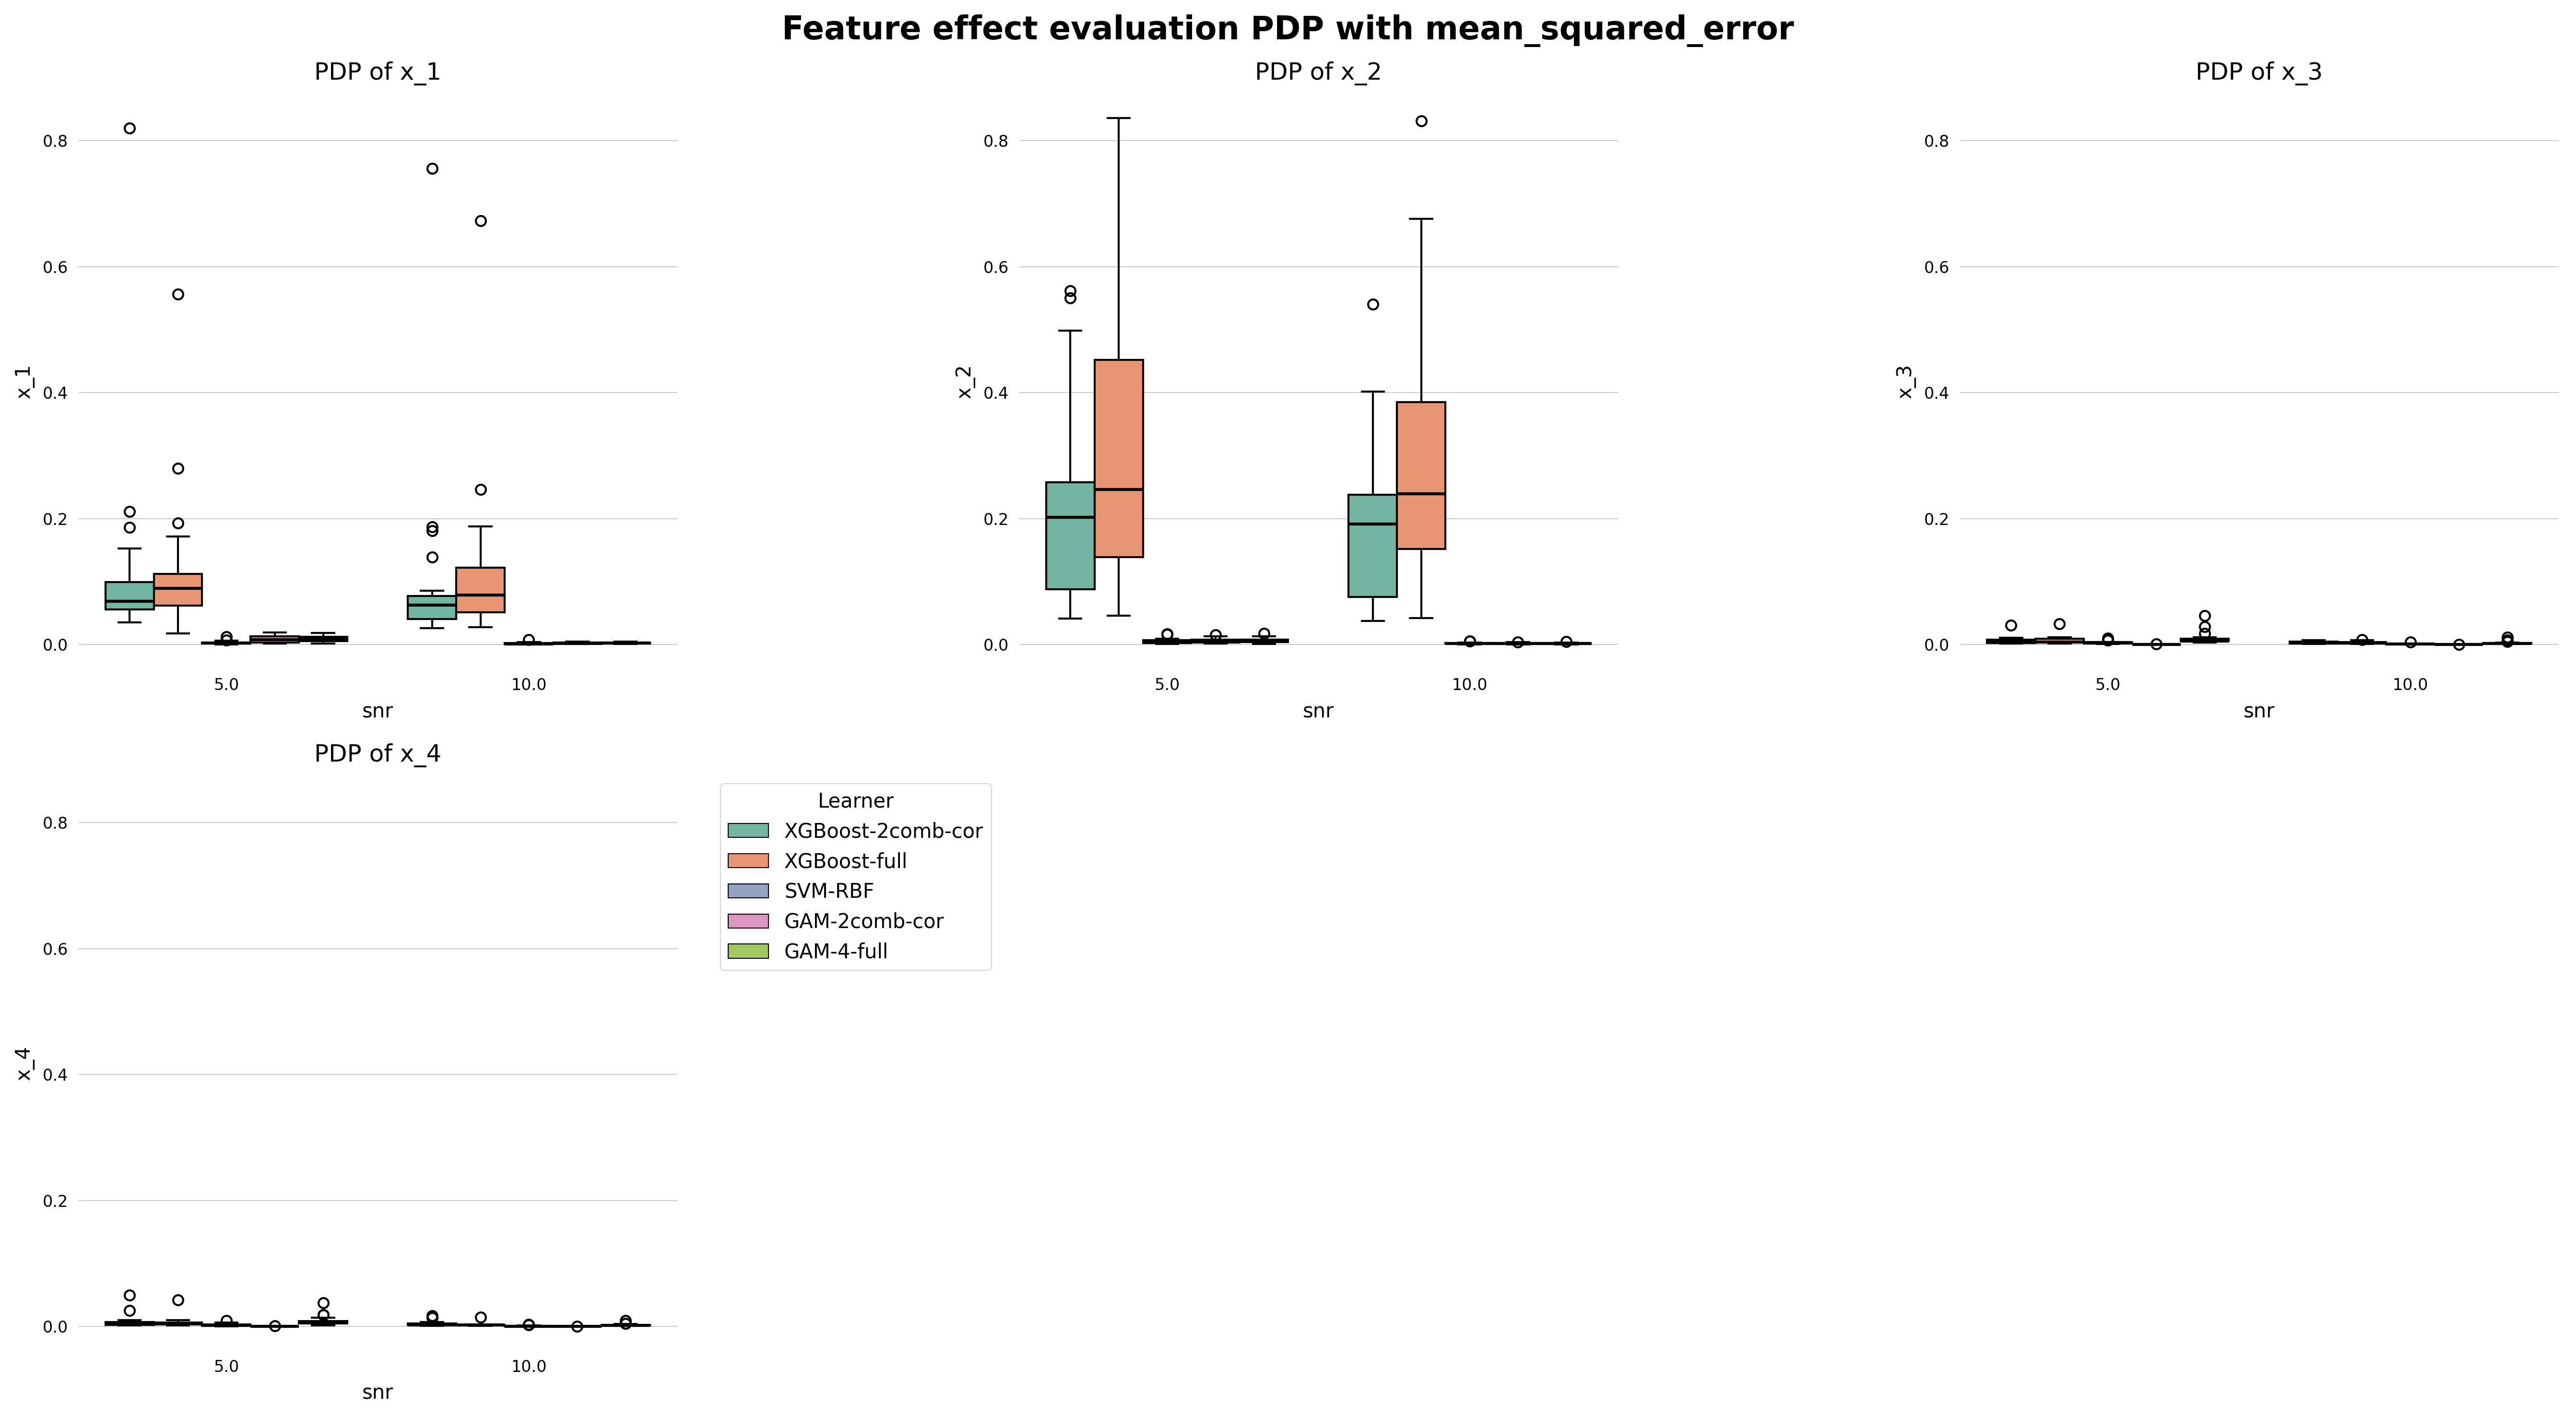

In [9]:
%matplotlib inline
boxplot_feature_effect_results(features=["x_1", "x_2", "x_3", "x_4"], df=df, effect_type="PDP");

### PDP example visualizations

In [10]:
md(f"(simulation no. {sim_no} with n_train={n_train} and snr={snr})")

(simulation no. 1 with n_train=1000 and snr=10)

In [11]:
# init groundtruth
groundtruth = load("../groundtruth.joblib")
# recreate dataset
X_train, y_train, X_test, y_test = generate_data(groundtruth, n_train, 1000, snr, seed=1)
# load models
gam_cor = load(f'../models/GAM-2comb-cor_{sim_no}_{n_train}_{snr}.joblib')
gam_full = load(f'../models/GAM-4-full_{sim_no}_{n_train}_{snr}.joblib')
xgb_full = load(f'../models/XGBoost-full_{sim_no}_{n_train}_{snr}.joblib')
xgb_cor = load(f'../models/XGBoost-2comb-cor_{sim_no}_{n_train}_{snr}.joblib')
svm = load(f'../models/SVM-RBF_{sim_no}_{n_train}_{snr}.joblib')

c:\Users\ti-he\OneDrive\Dokumente\Projekte\feature-effect-empirical-analysis\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


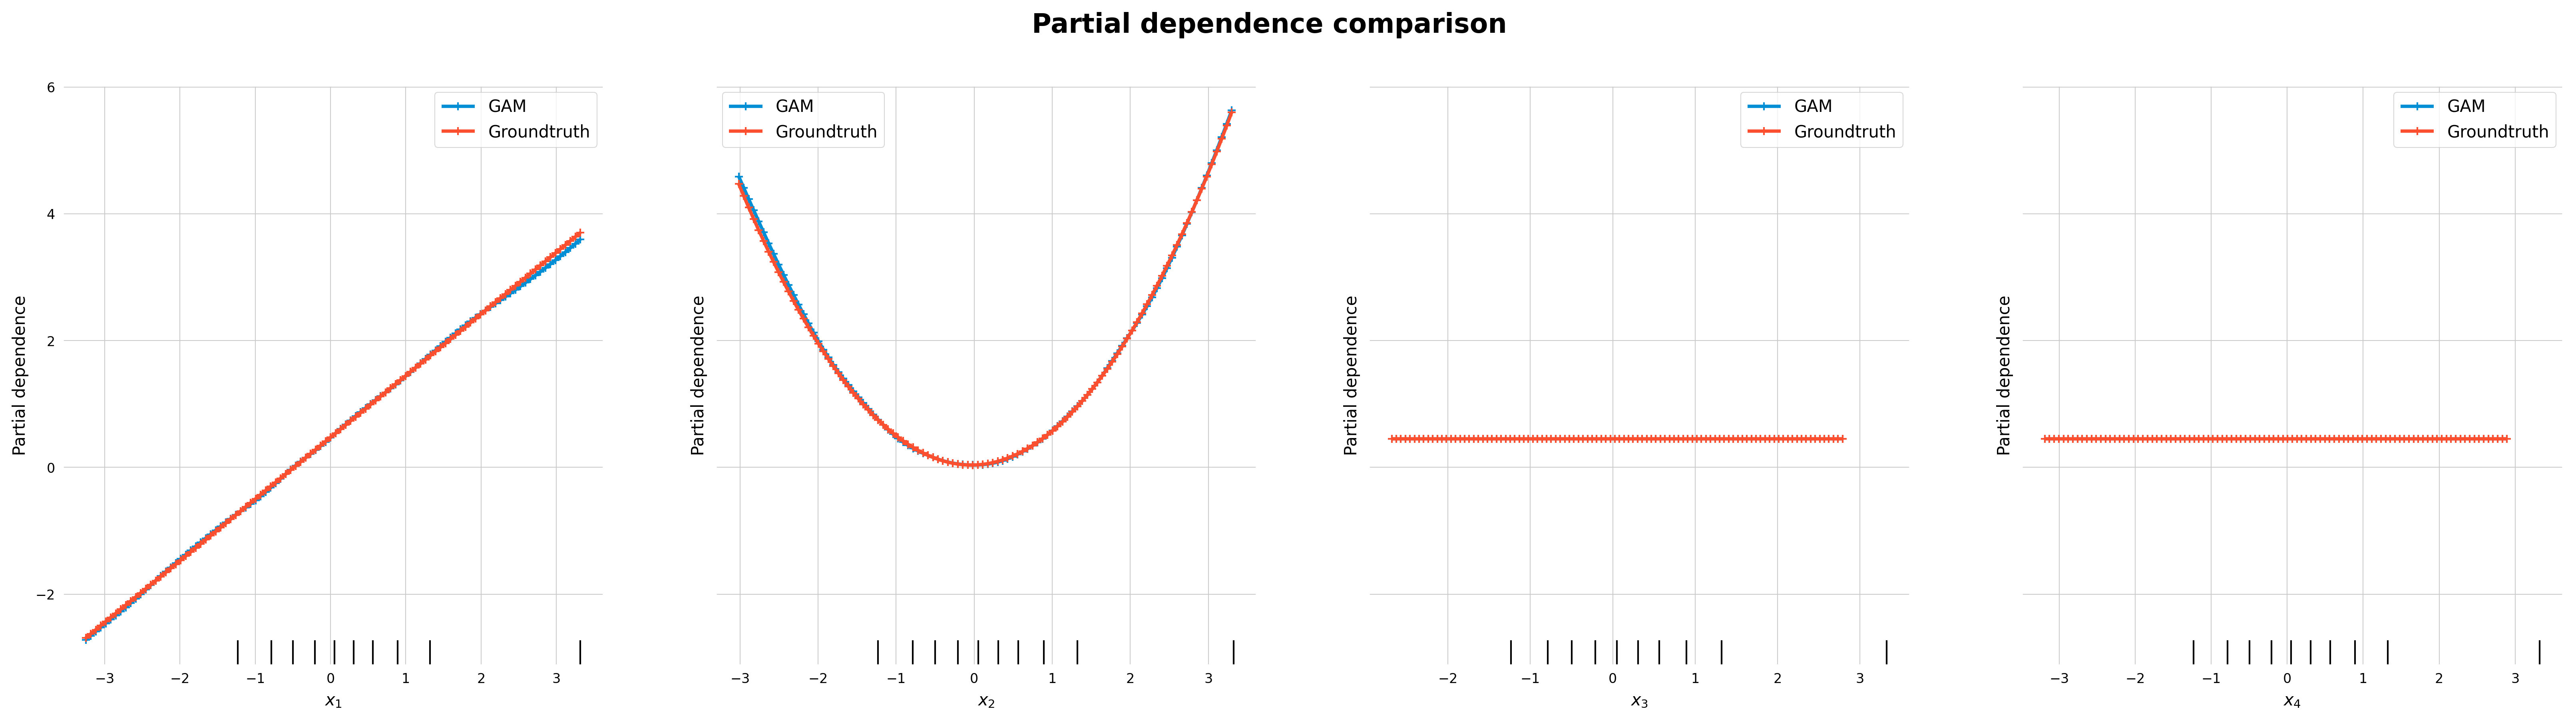

In [12]:
%matplotlib inline
plot_effect_comparison(gam_cor, groundtruth, X_train, effect="PDP", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

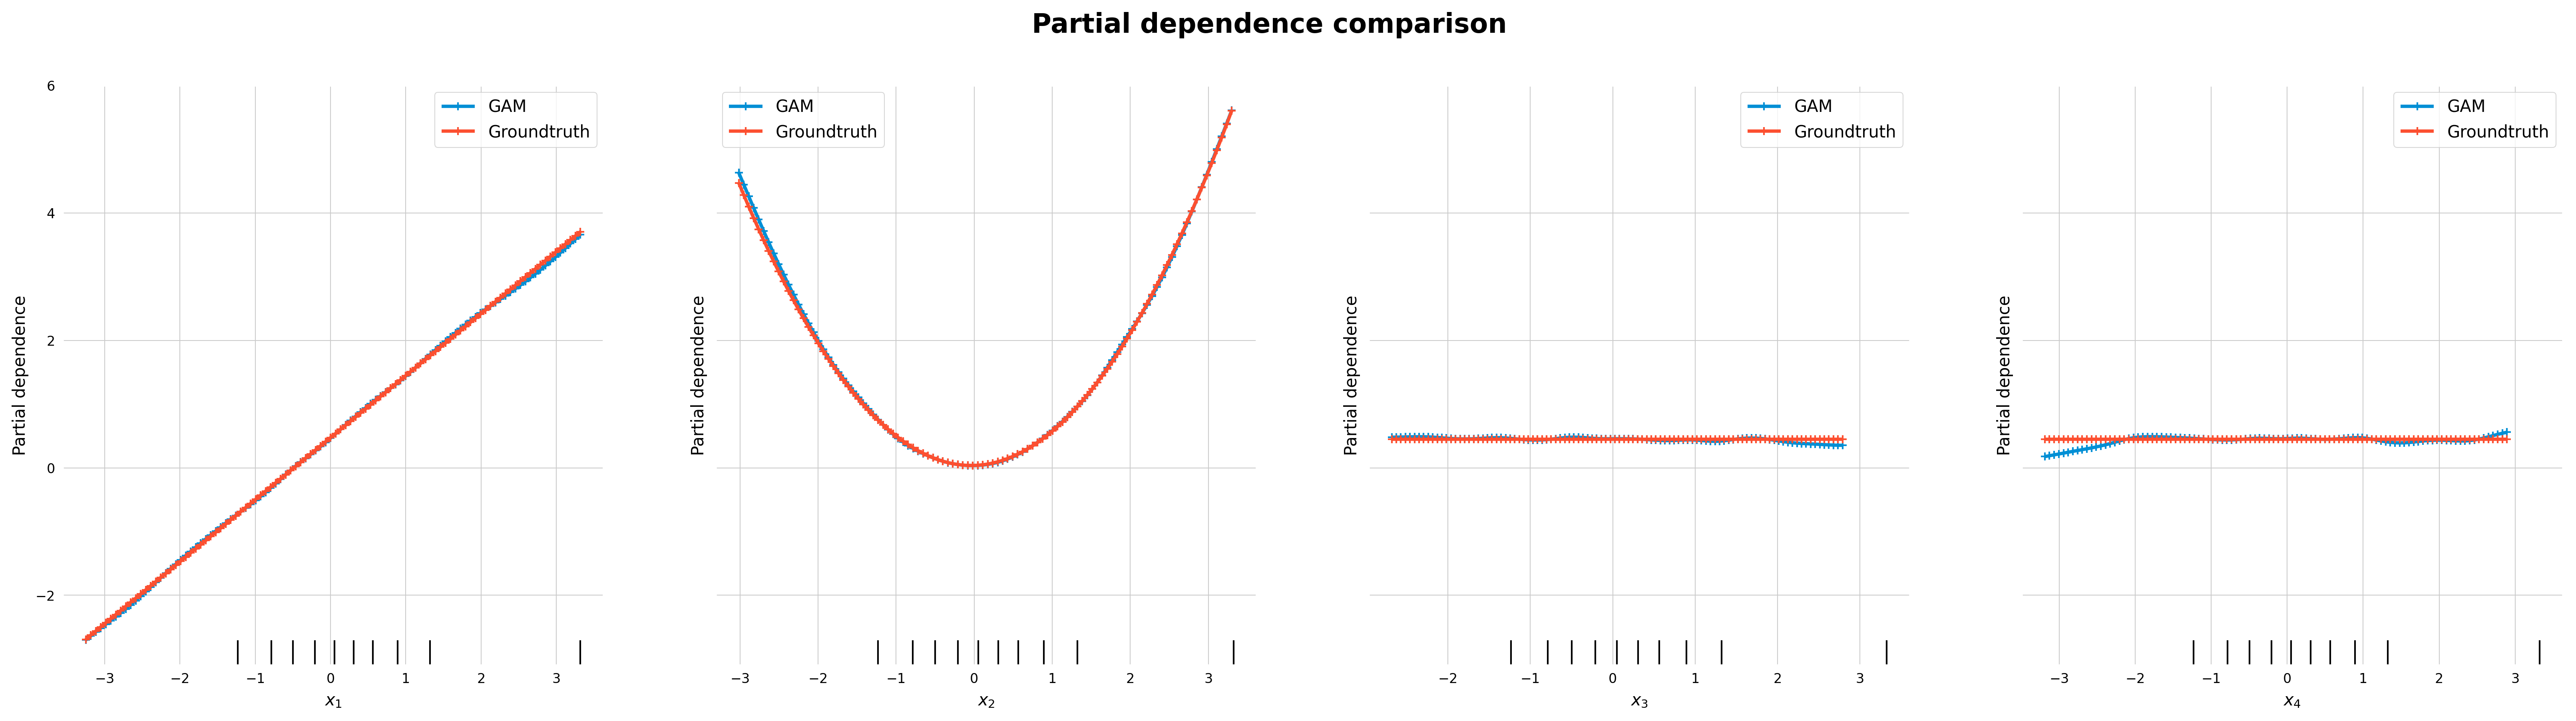

In [13]:
%matplotlib inline
plot_effect_comparison(gam_full, groundtruth, X_train, effect="PDP", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

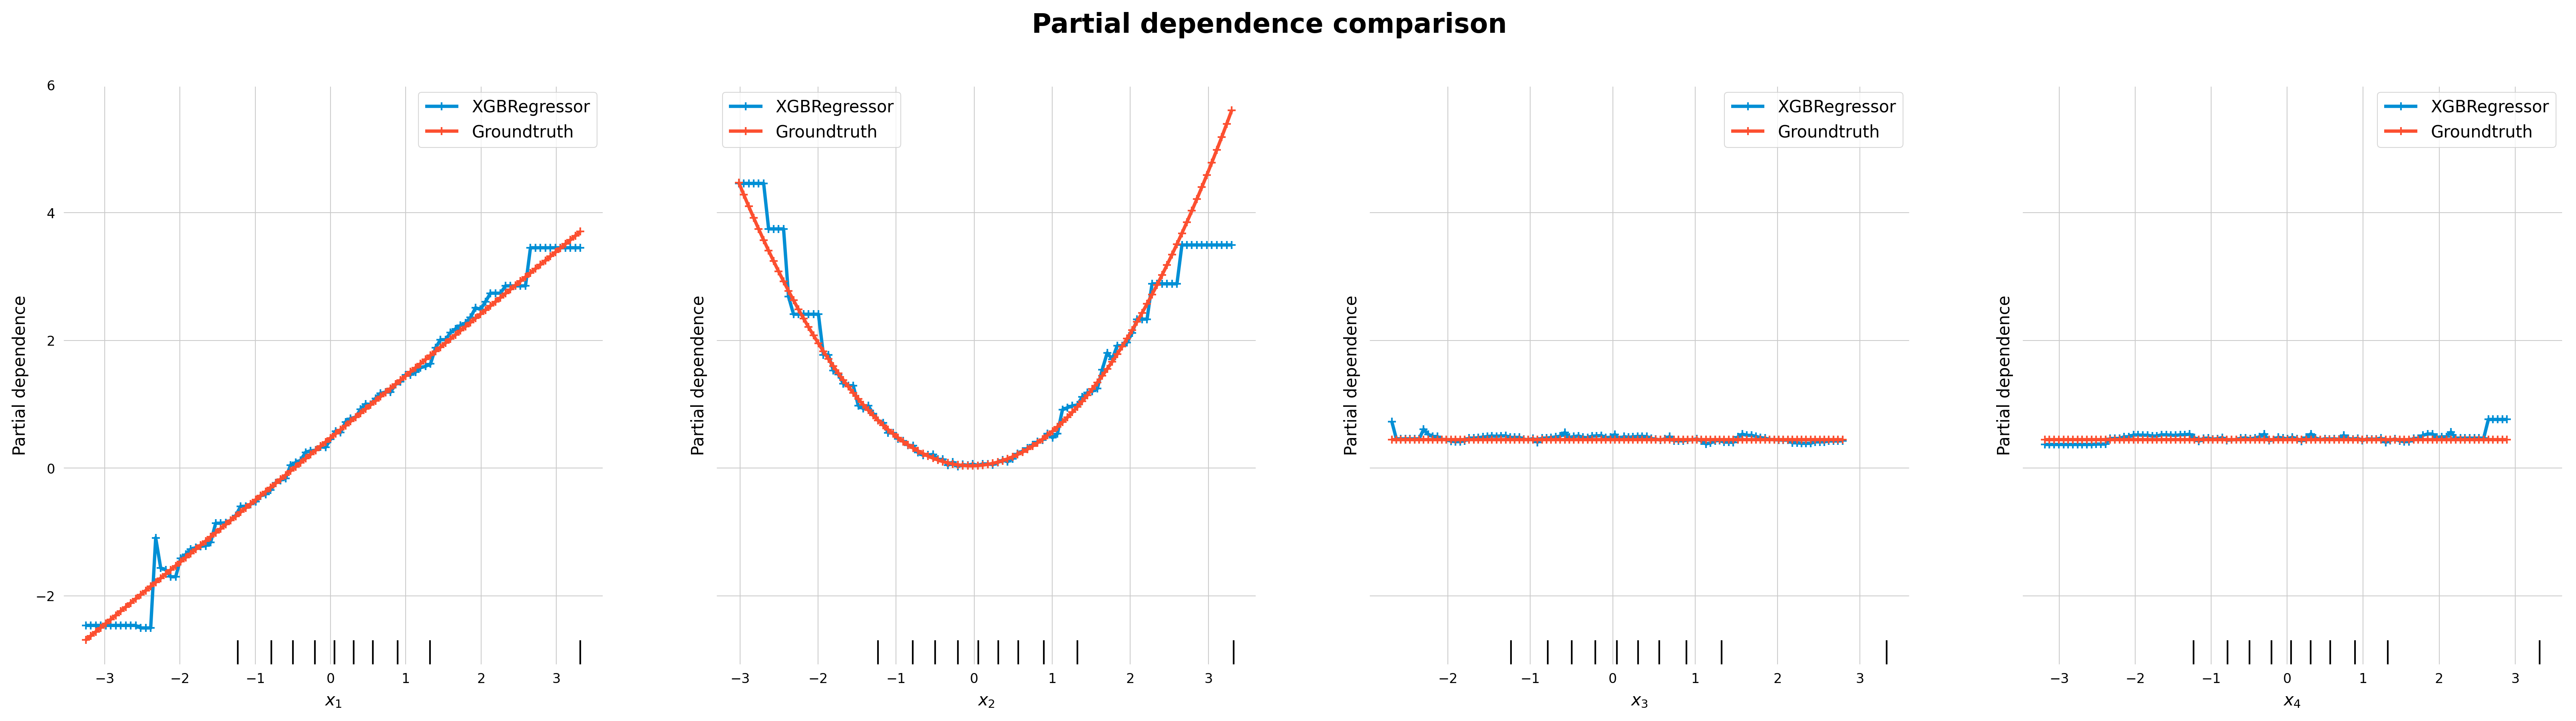

In [14]:
%matplotlib inline
plot_effect_comparison(xgb_full, groundtruth, X_train, effect="PDP", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

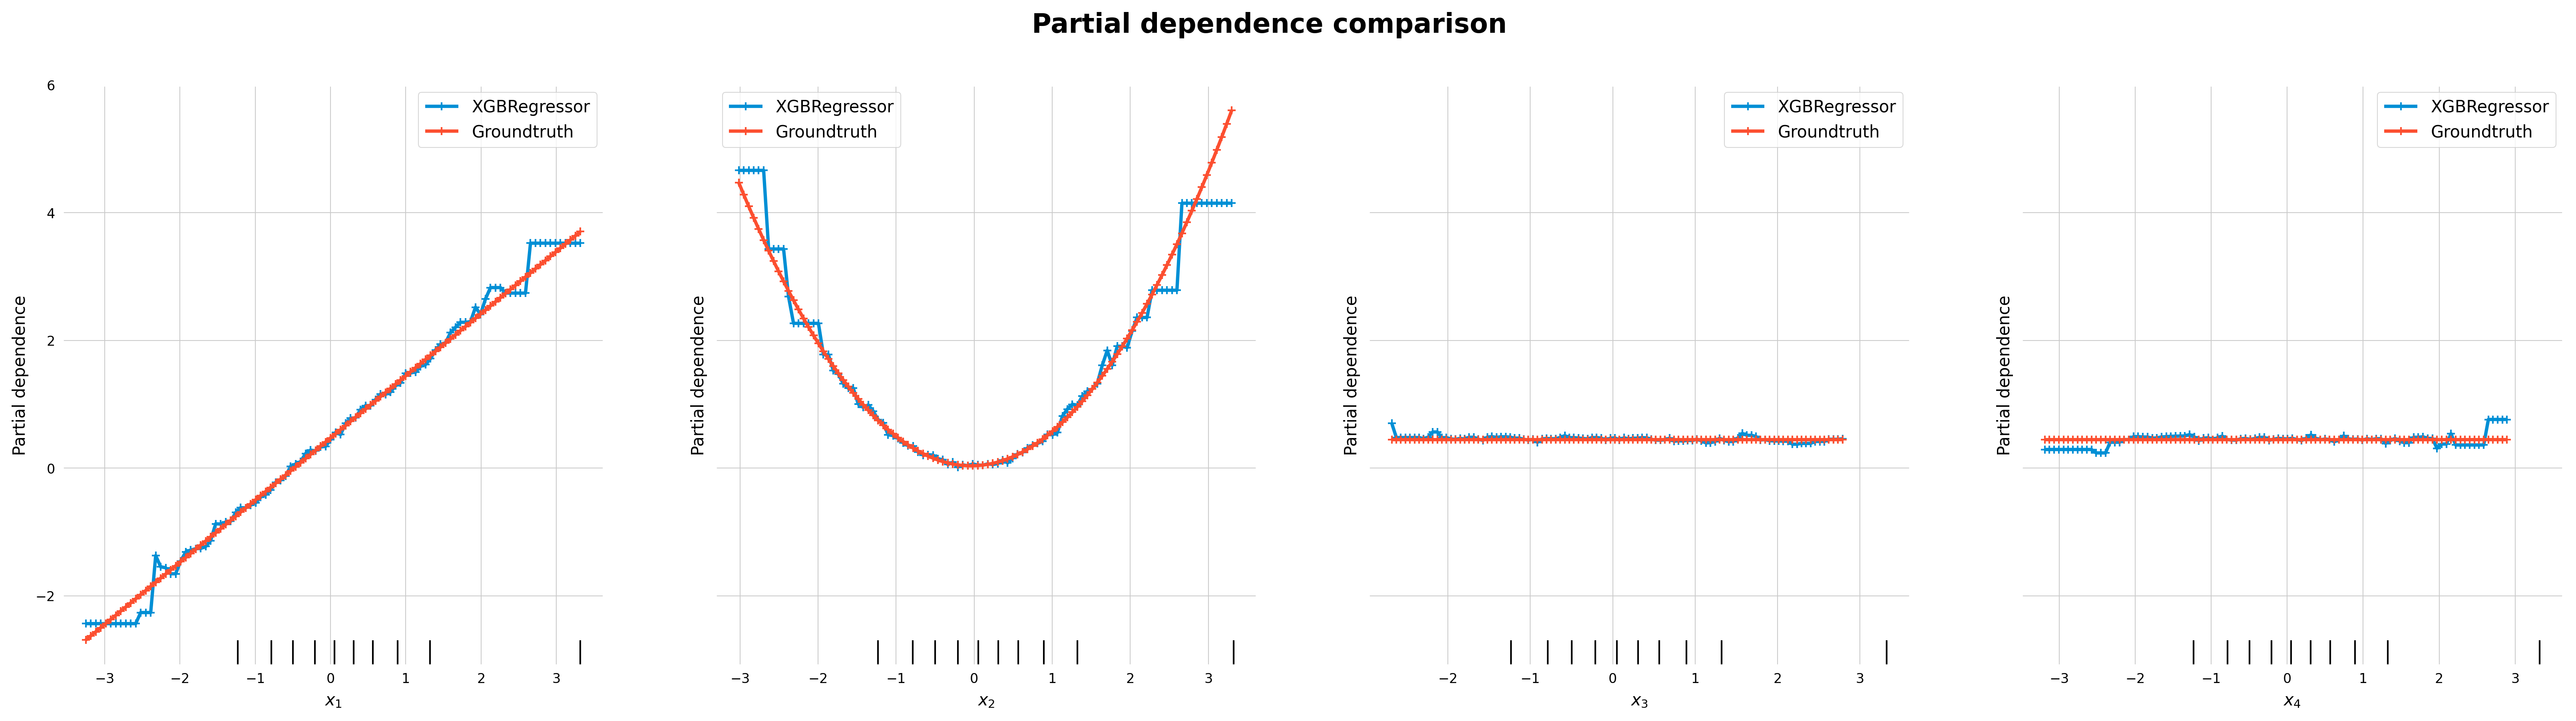

In [15]:
%matplotlib inline
plot_effect_comparison(xgb_cor, groundtruth, X_train, effect="PDP", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

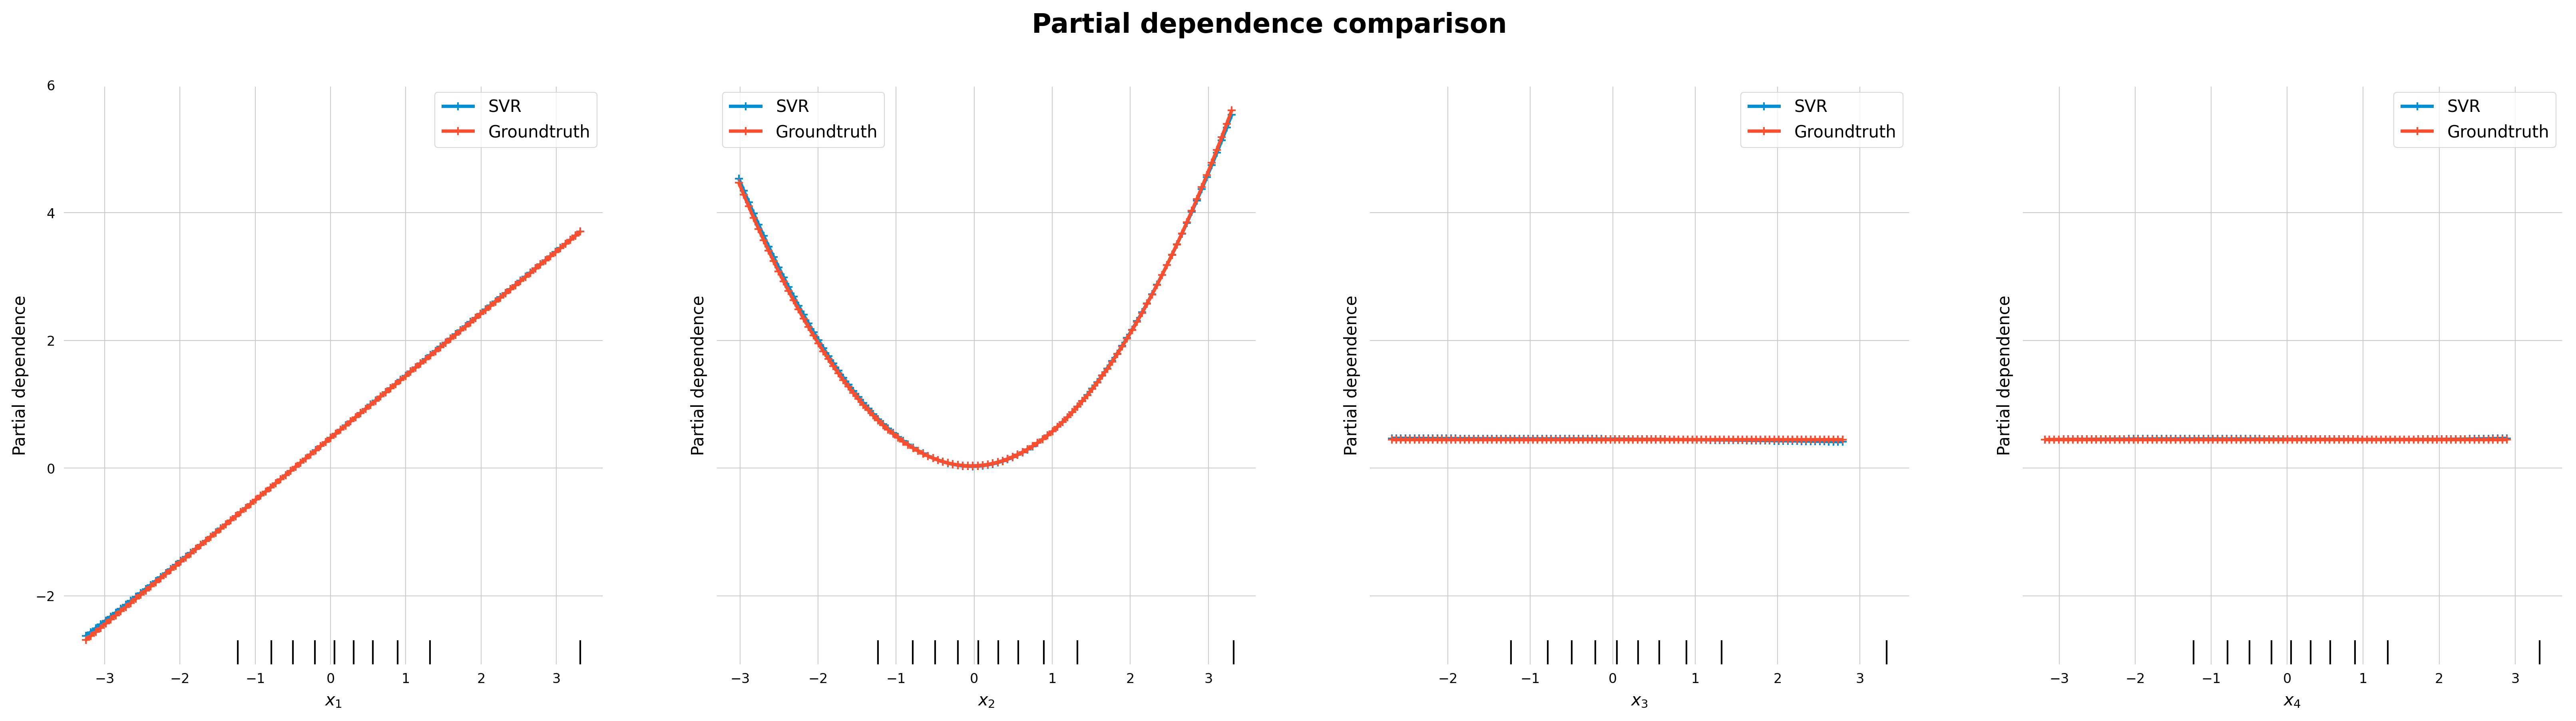

In [16]:
%matplotlib inline
plot_effect_comparison(svm, groundtruth, X_train, effect="PDP", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

## ALE

### Error of Model-ALE compared to groundtruth-ALE

In [17]:
effects_results_storage = config.get("storage", "effects_results")
df = pd.read_sql_table("ale_results", f"sqlite:///..{effects_results_storage}")
df

,index,model_id,model,simulation,n_train,snr,metric,x_1,x_2,x_3,x_4
0,0,XGBoost-2comb-cor_1_1000_10,XGBoost-2comb-cor,1,1000,10.0,mean_squared_error,0.033380,0.084909,0.001532,0.002032
1,0,XGBoost-full_1_1000_10,XGBoost-full,1,1000,10.0,mean_squared_error,0.036309,0.118004,0.004219,0.004801
2,0,SVM-RBF_1_1000_10,SVM-RBF,1,1000,10.0,mean_squared_error,0.000395,0.000405,0.000079,0.000026
3,0,GAM-2comb-cor_1_1000_10,GAM-2comb-cor,1,1000,10.0,mean_squared_error,0.000279,0.000284,0.000000,0.000000
4,0,GAM-4-full_1_1000_10,GAM-4-full,1,1000,10.0,mean_squared_error,0.000159,0.000517,0.000418,0.000812
...,...,...,...,...,...,...,...,...,...,...,...
195,0,XGBoost-2comb-cor_20_1000_5,XGBoost-2comb-cor,20,1000,5.0,mean_squared_error,0.025189,0.014877,0.003350,0.001029
196,0,XGBoost-full_20_1000_5,XGBoost-full,20,1000,5.0,mean_squared_error,0.045644,0.016771,0.009820,0.012455
197,0,SVM-RBF_20_1000_5,SVM-RBF,20,1000,5.0,mean_squared_error,0.000574,0.001557,0.000814,0.000043
198,0,GAM-2comb-cor_20_1000_5,GAM-2comb-cor,20,1000,5.0,mean_squared_error,0.000499,0.001775,0.000000,0.000000


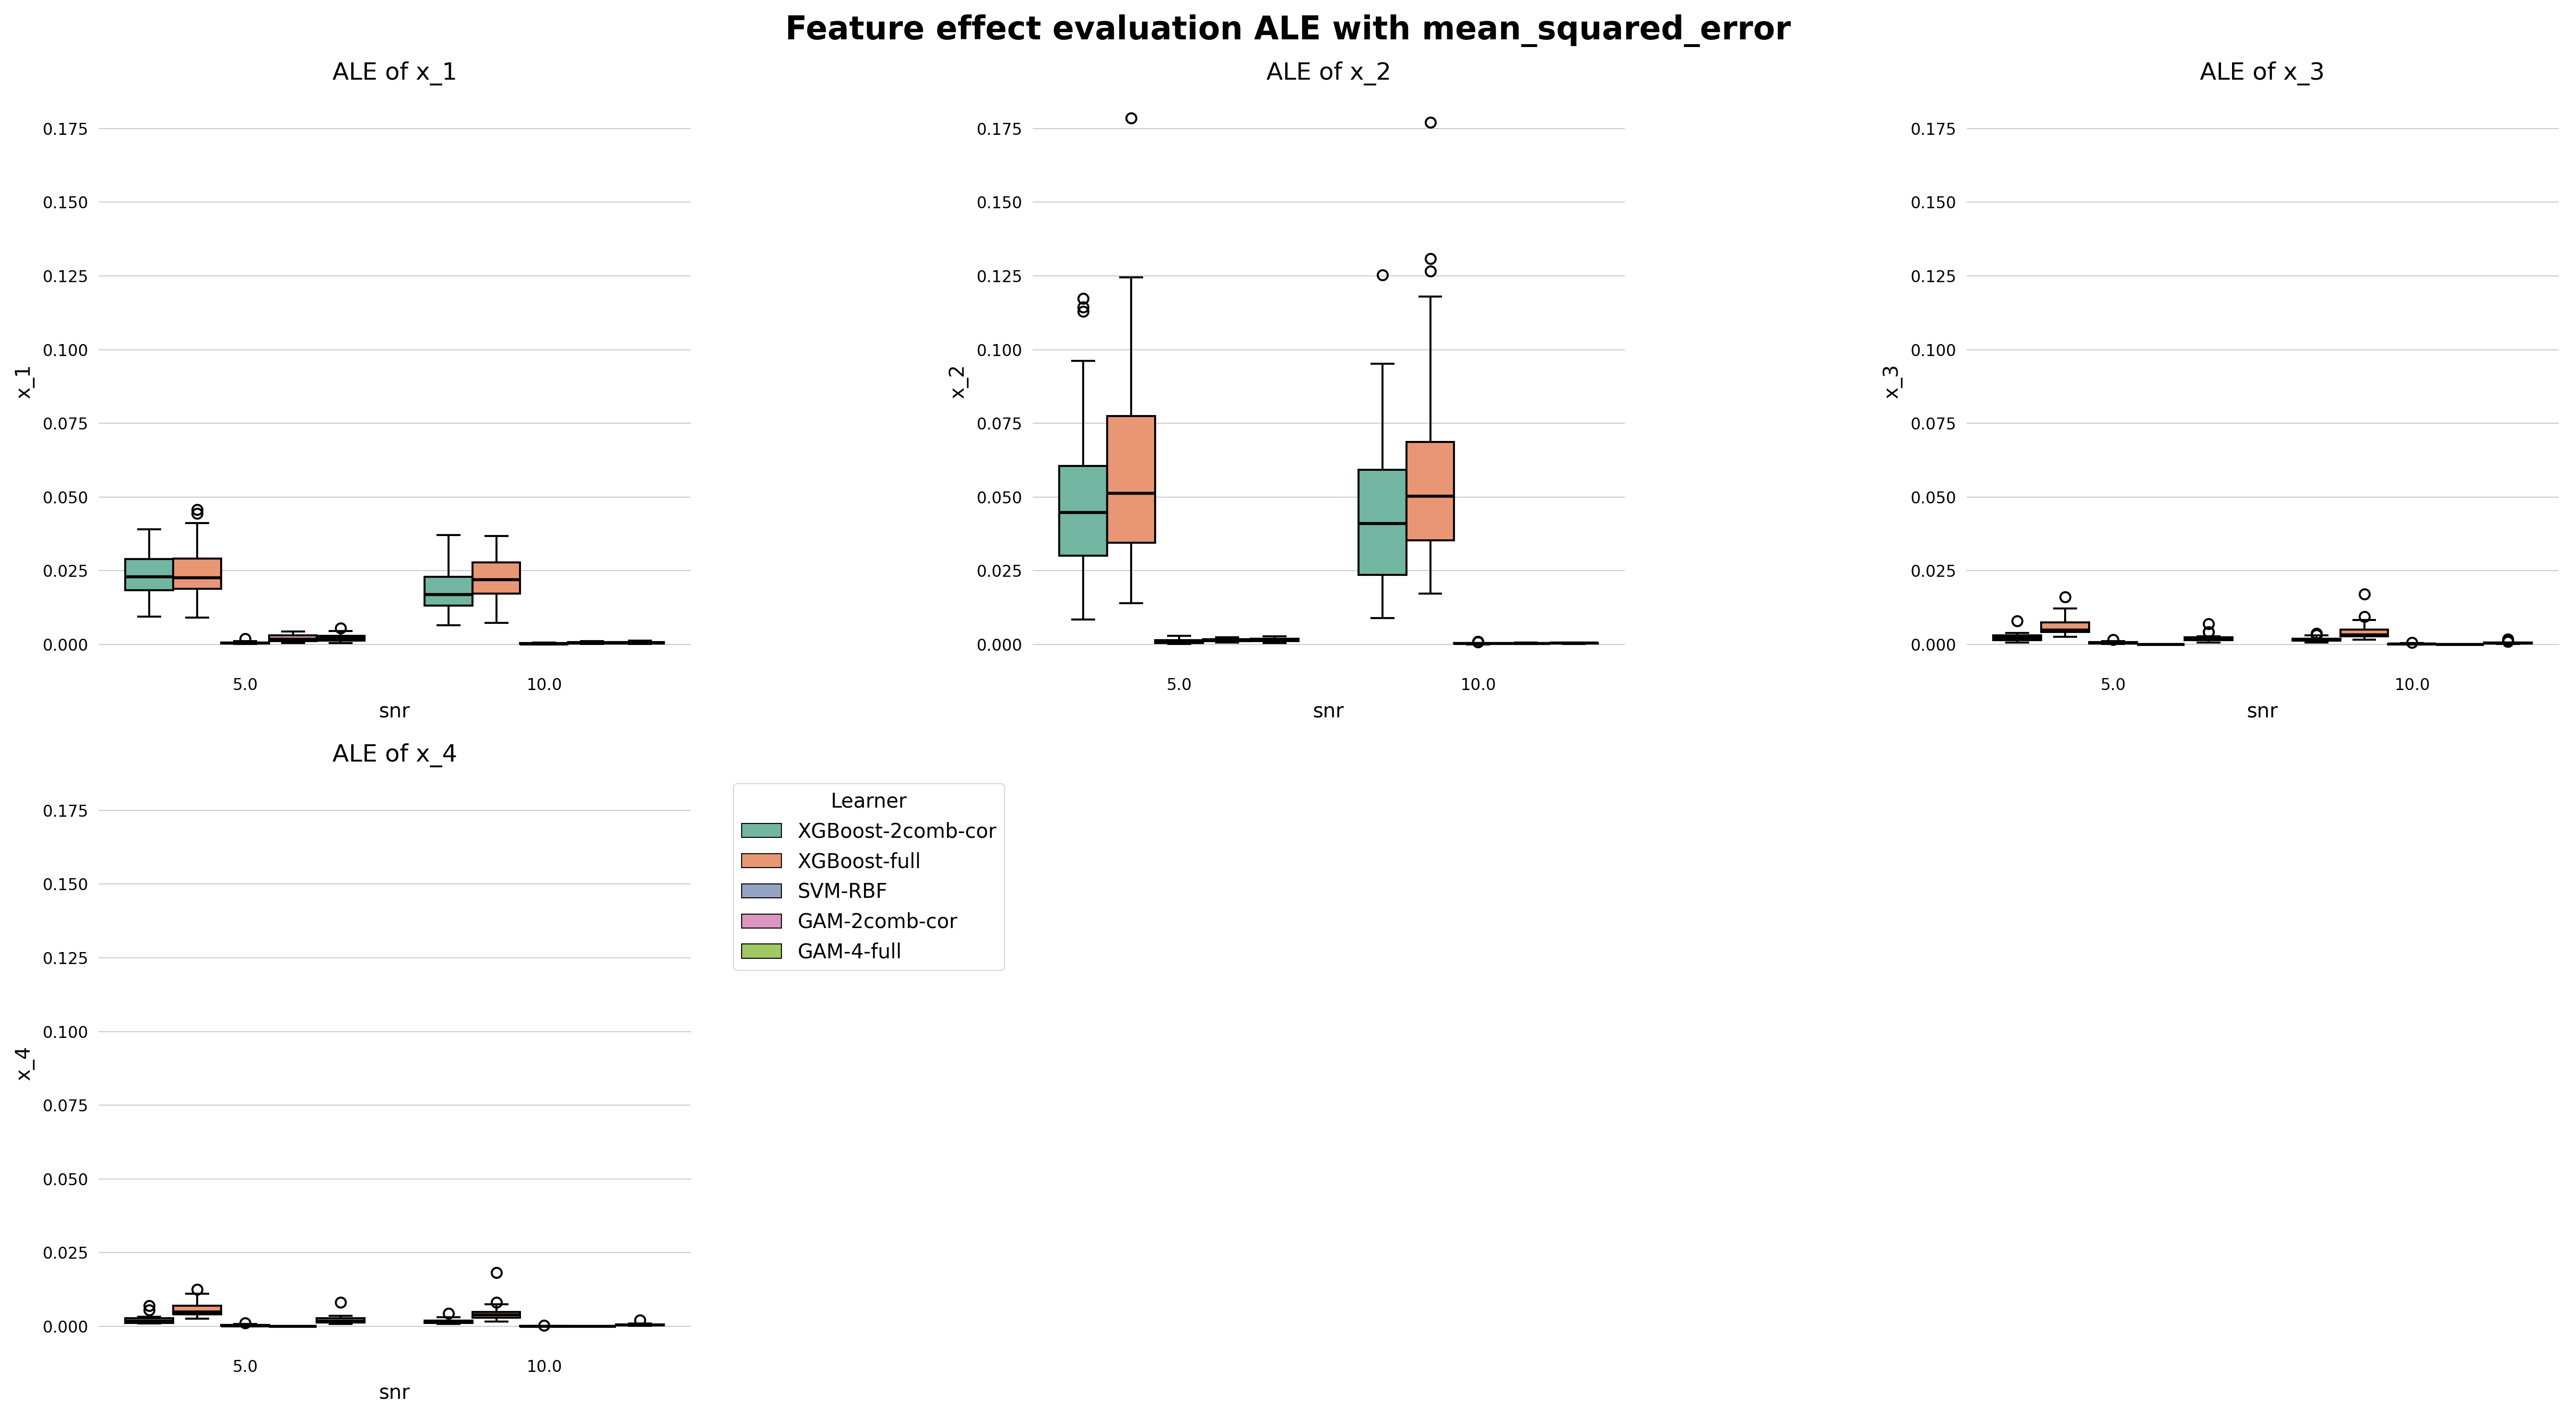

In [18]:
%matplotlib inline
boxplot_feature_effect_results(features=["x_1", "x_2", "x_3", "x_4"], df=df, effect_type="ALE");

### ALE example visualizations

In [19]:
md(f"(simulation no. {sim_no} with n_train={n_train} and noise_sd={snr})")

(simulation no. 1 with n_train=1000 and noise_sd=10)

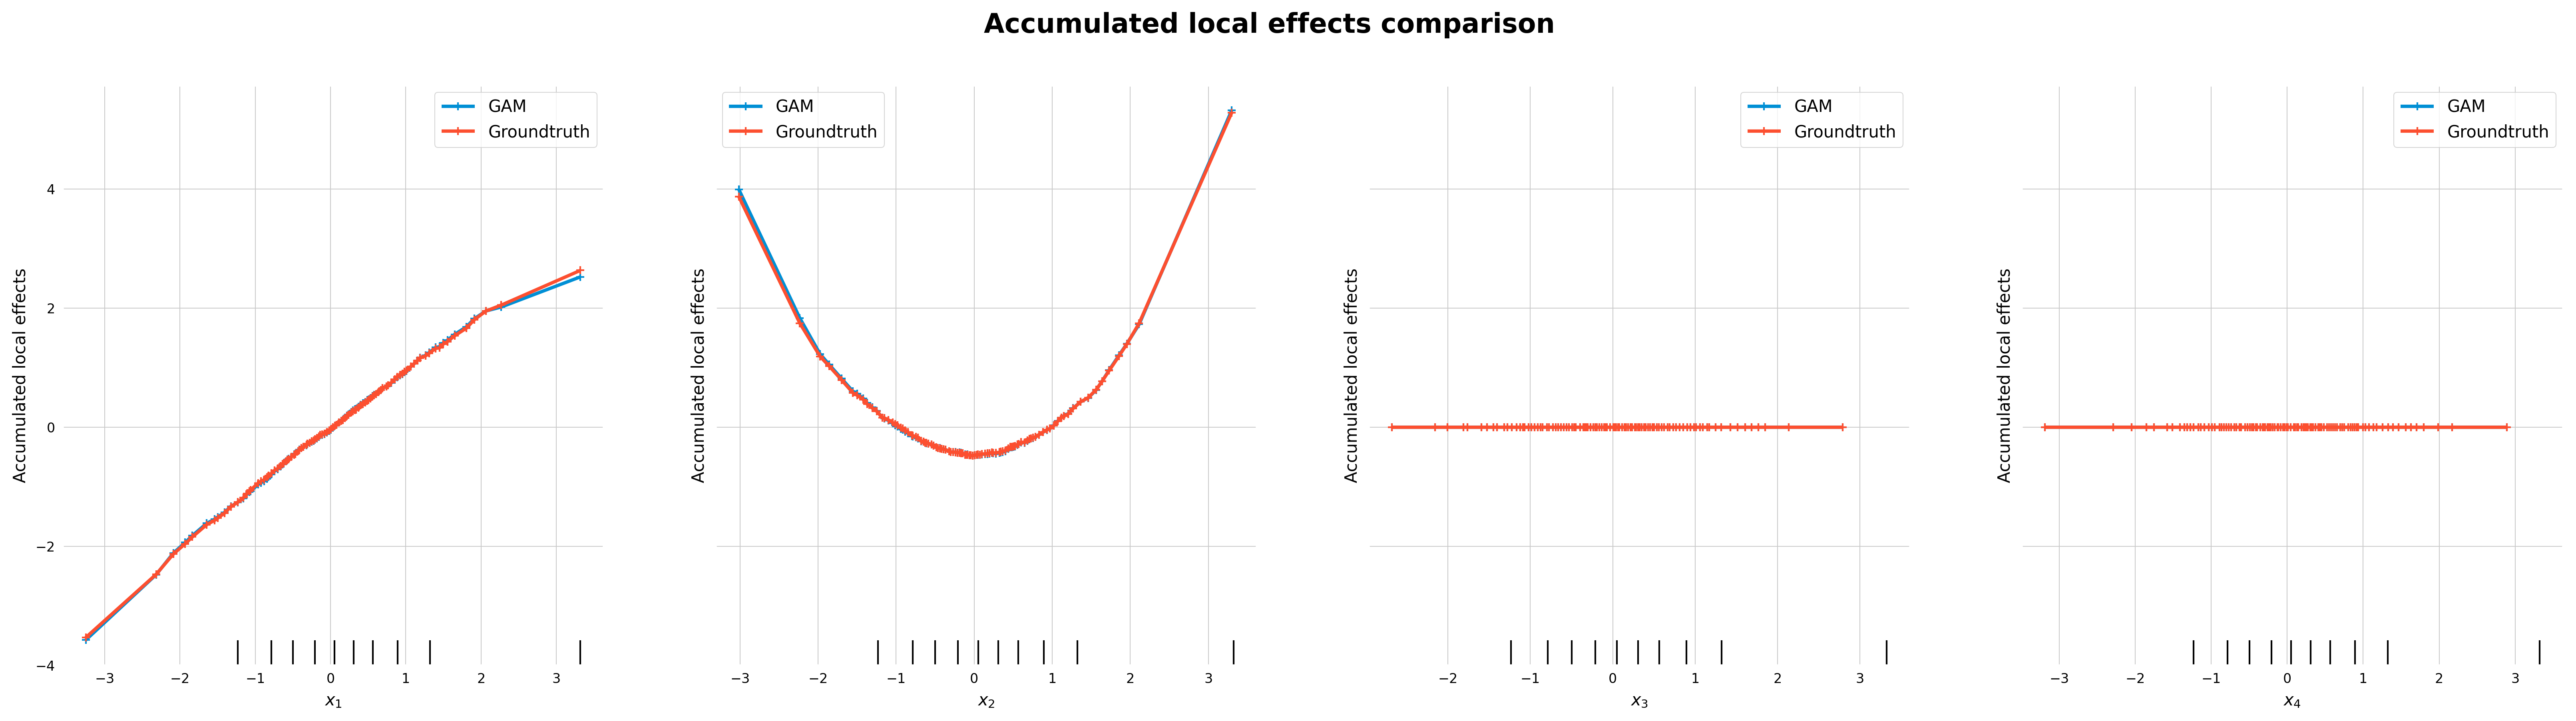

In [20]:
%matplotlib inline
plot_effect_comparison(gam_cor, groundtruth, X_train, effect="ALE", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

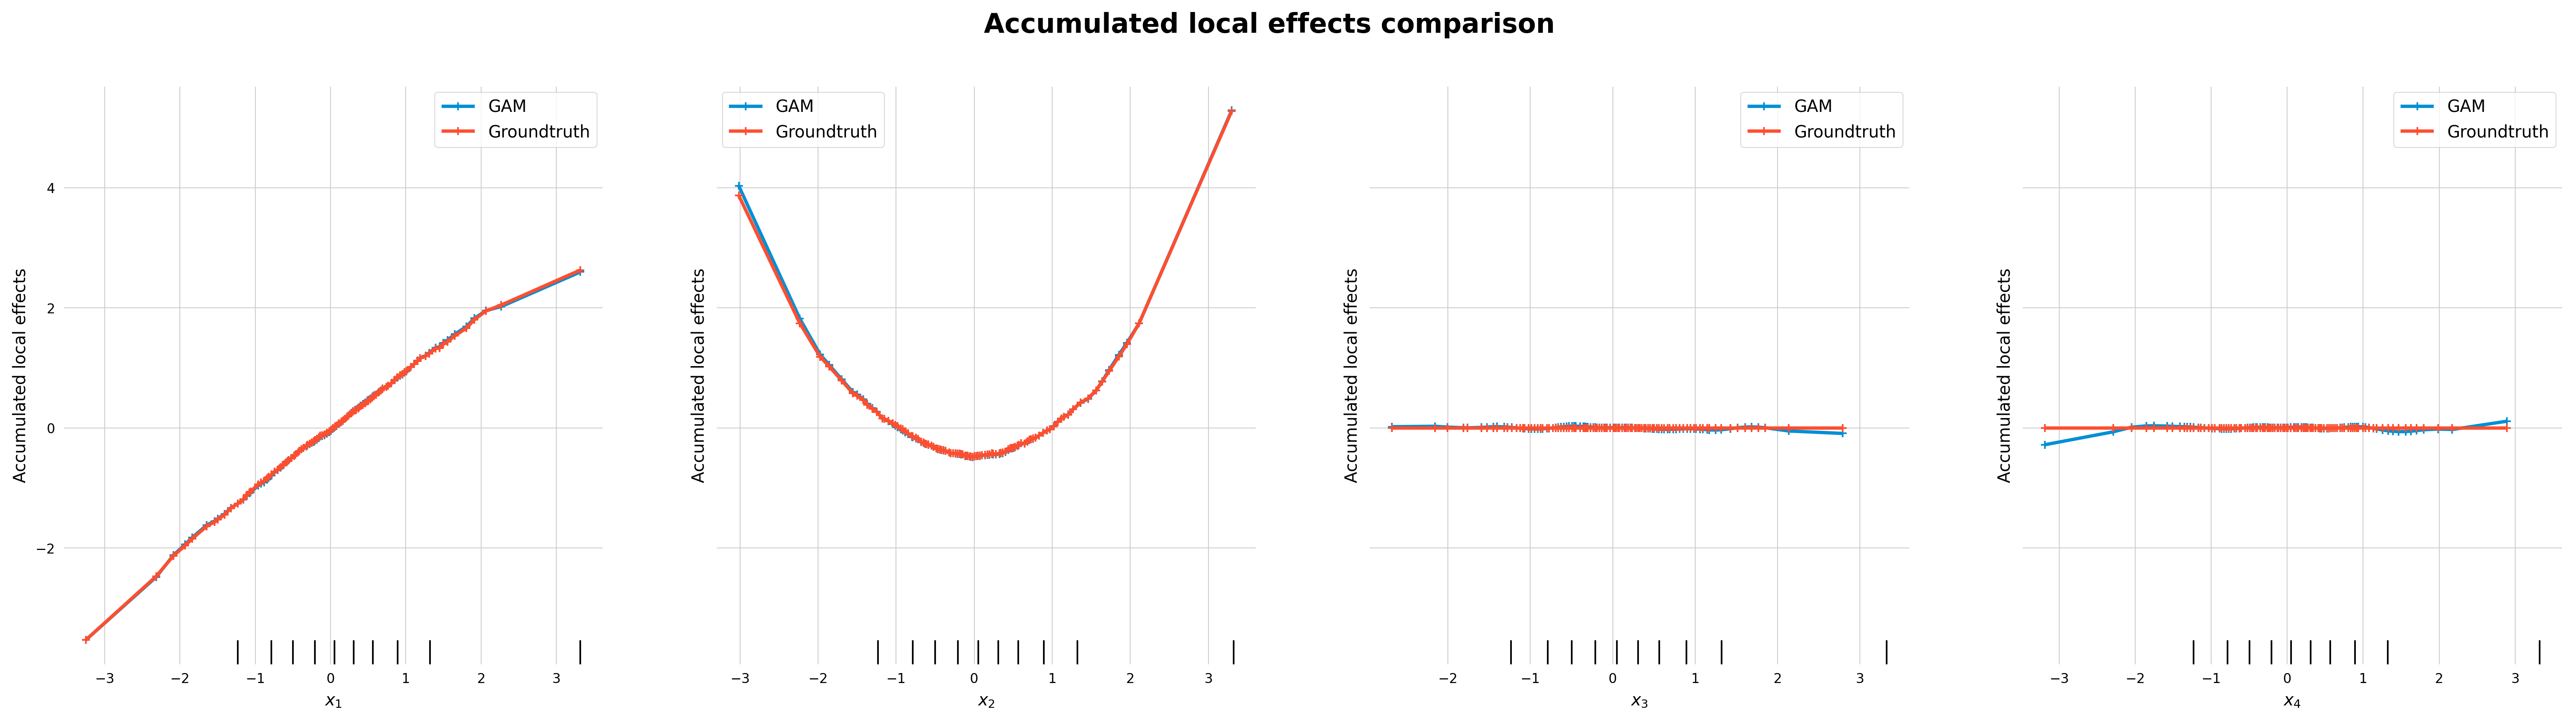

In [21]:
%matplotlib inline
plot_effect_comparison(gam_full, groundtruth, X_train, effect="ALE", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

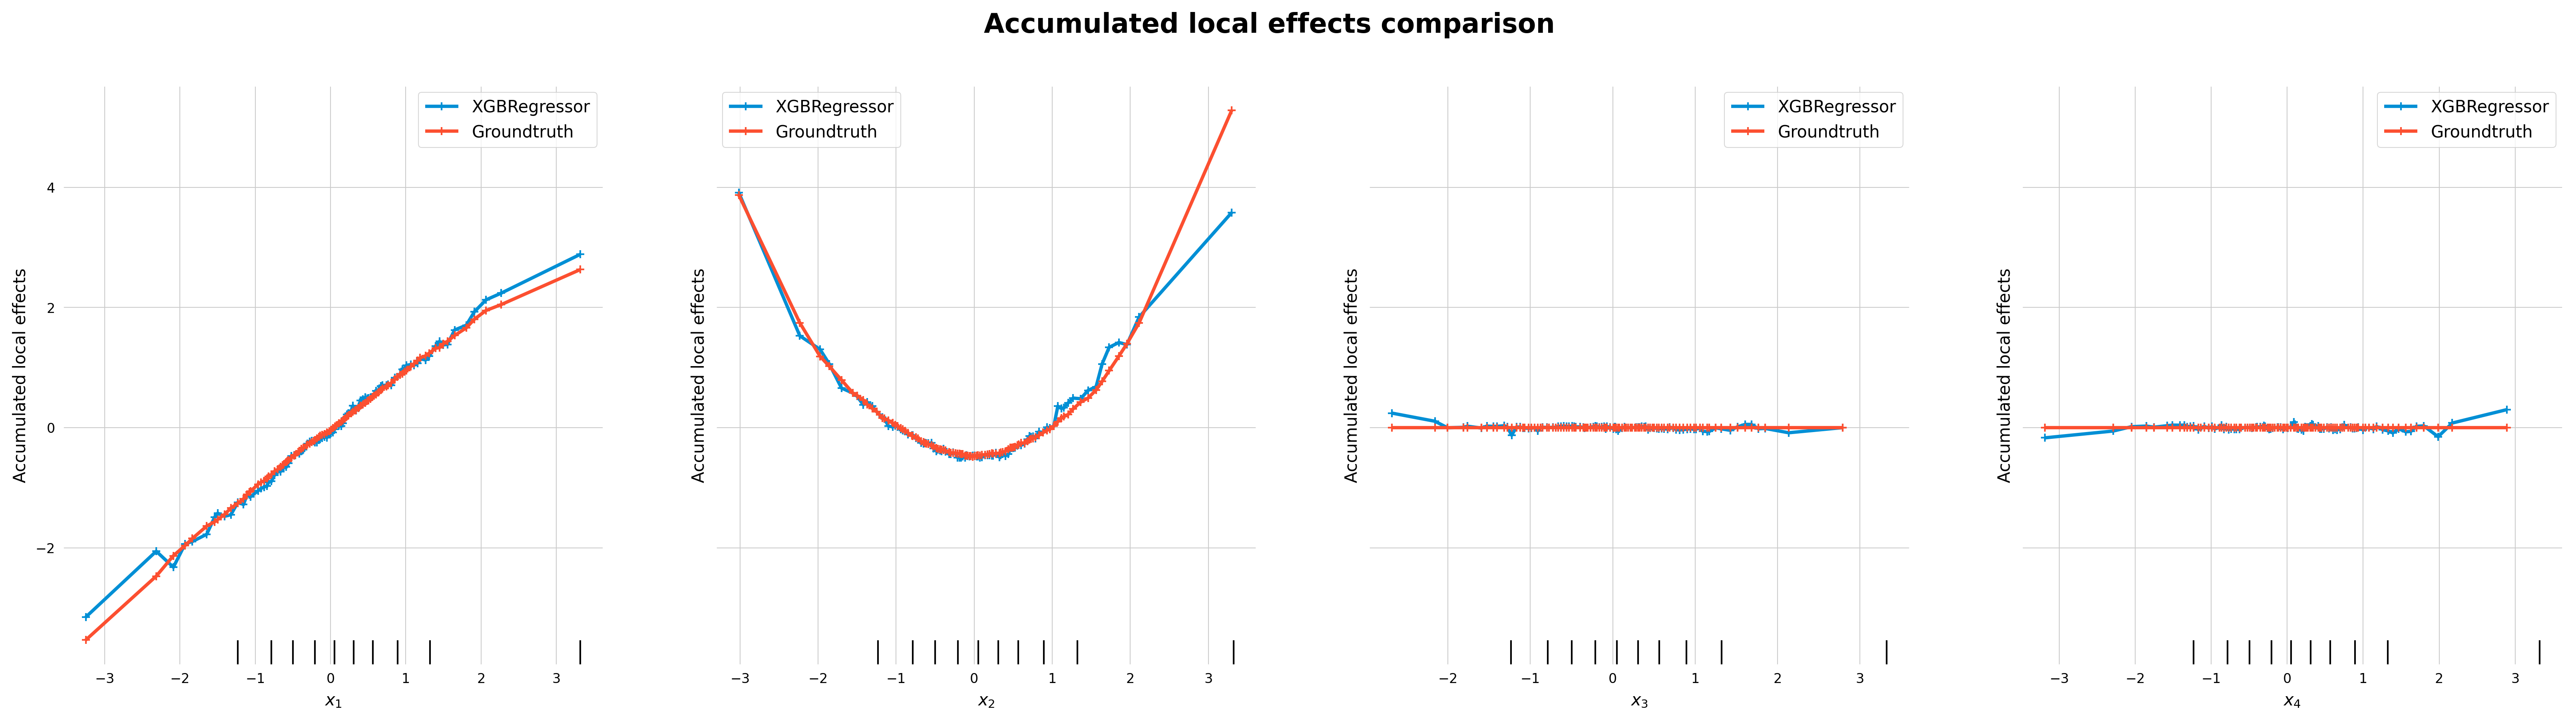

In [22]:
%matplotlib inline
plot_effect_comparison(xgb_cor, groundtruth, X_train, effect="ALE", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

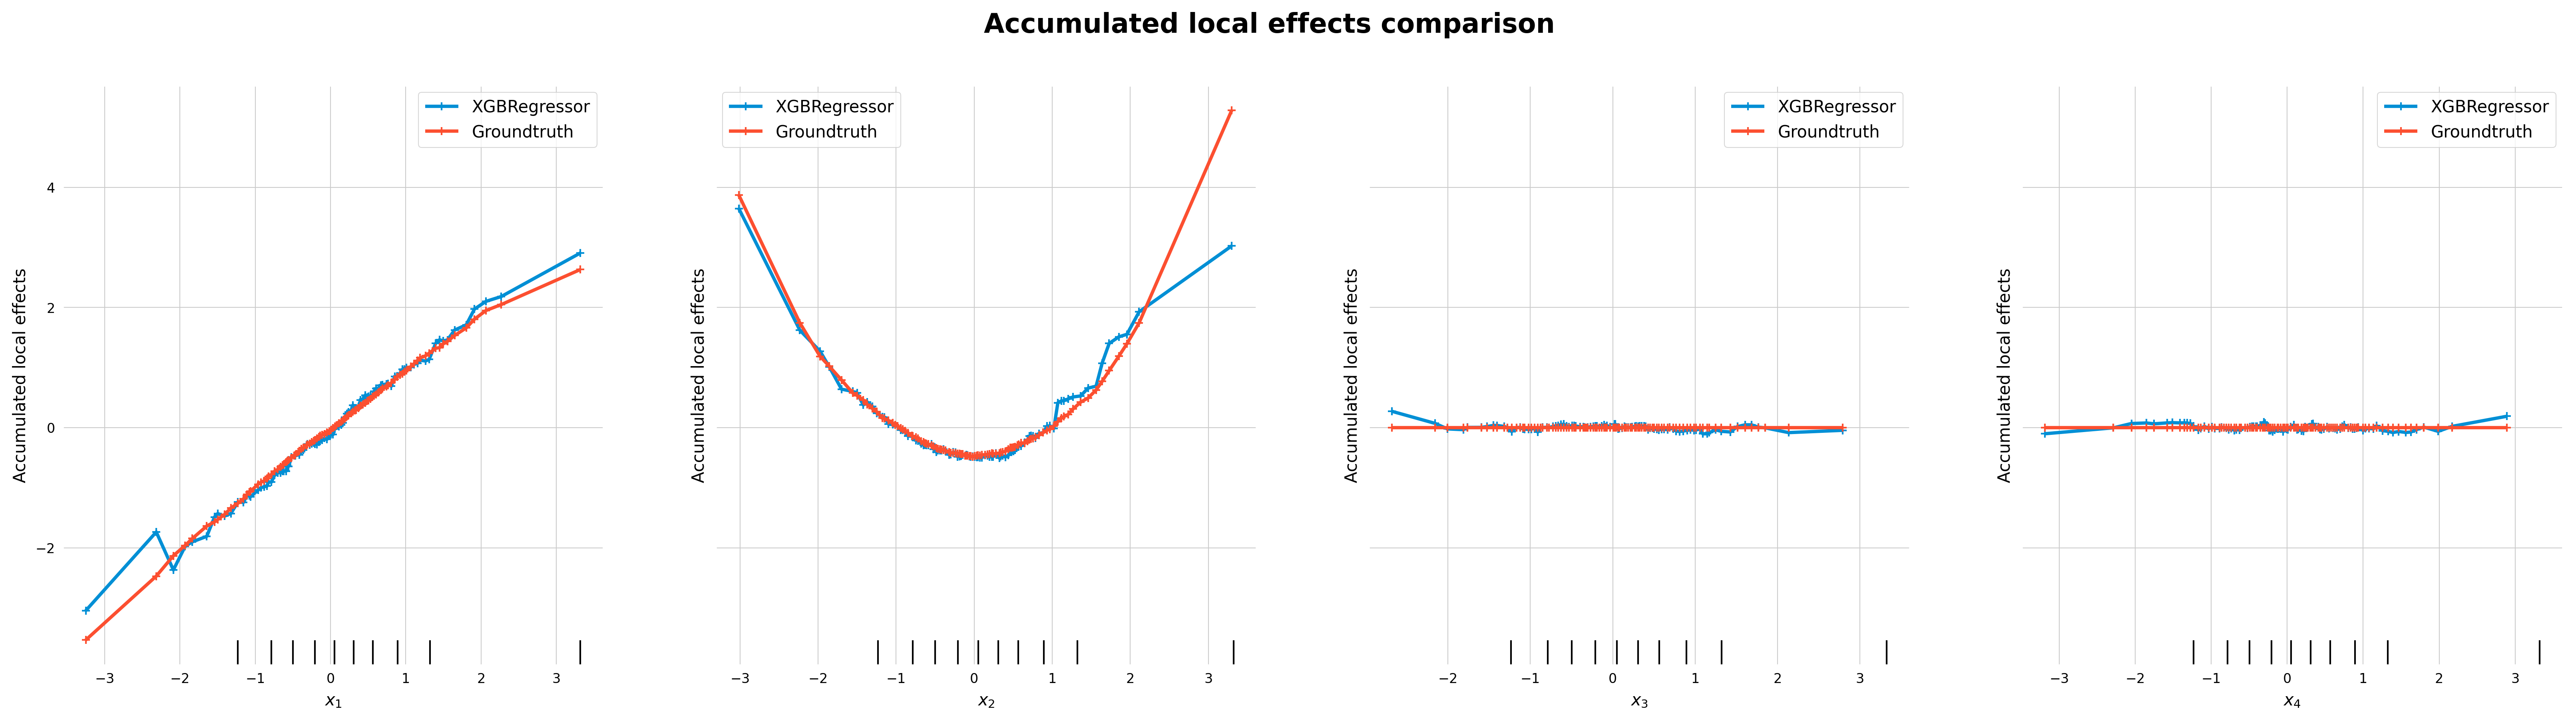

In [23]:
%matplotlib inline
plot_effect_comparison(xgb_full, groundtruth, X_train, effect="ALE", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

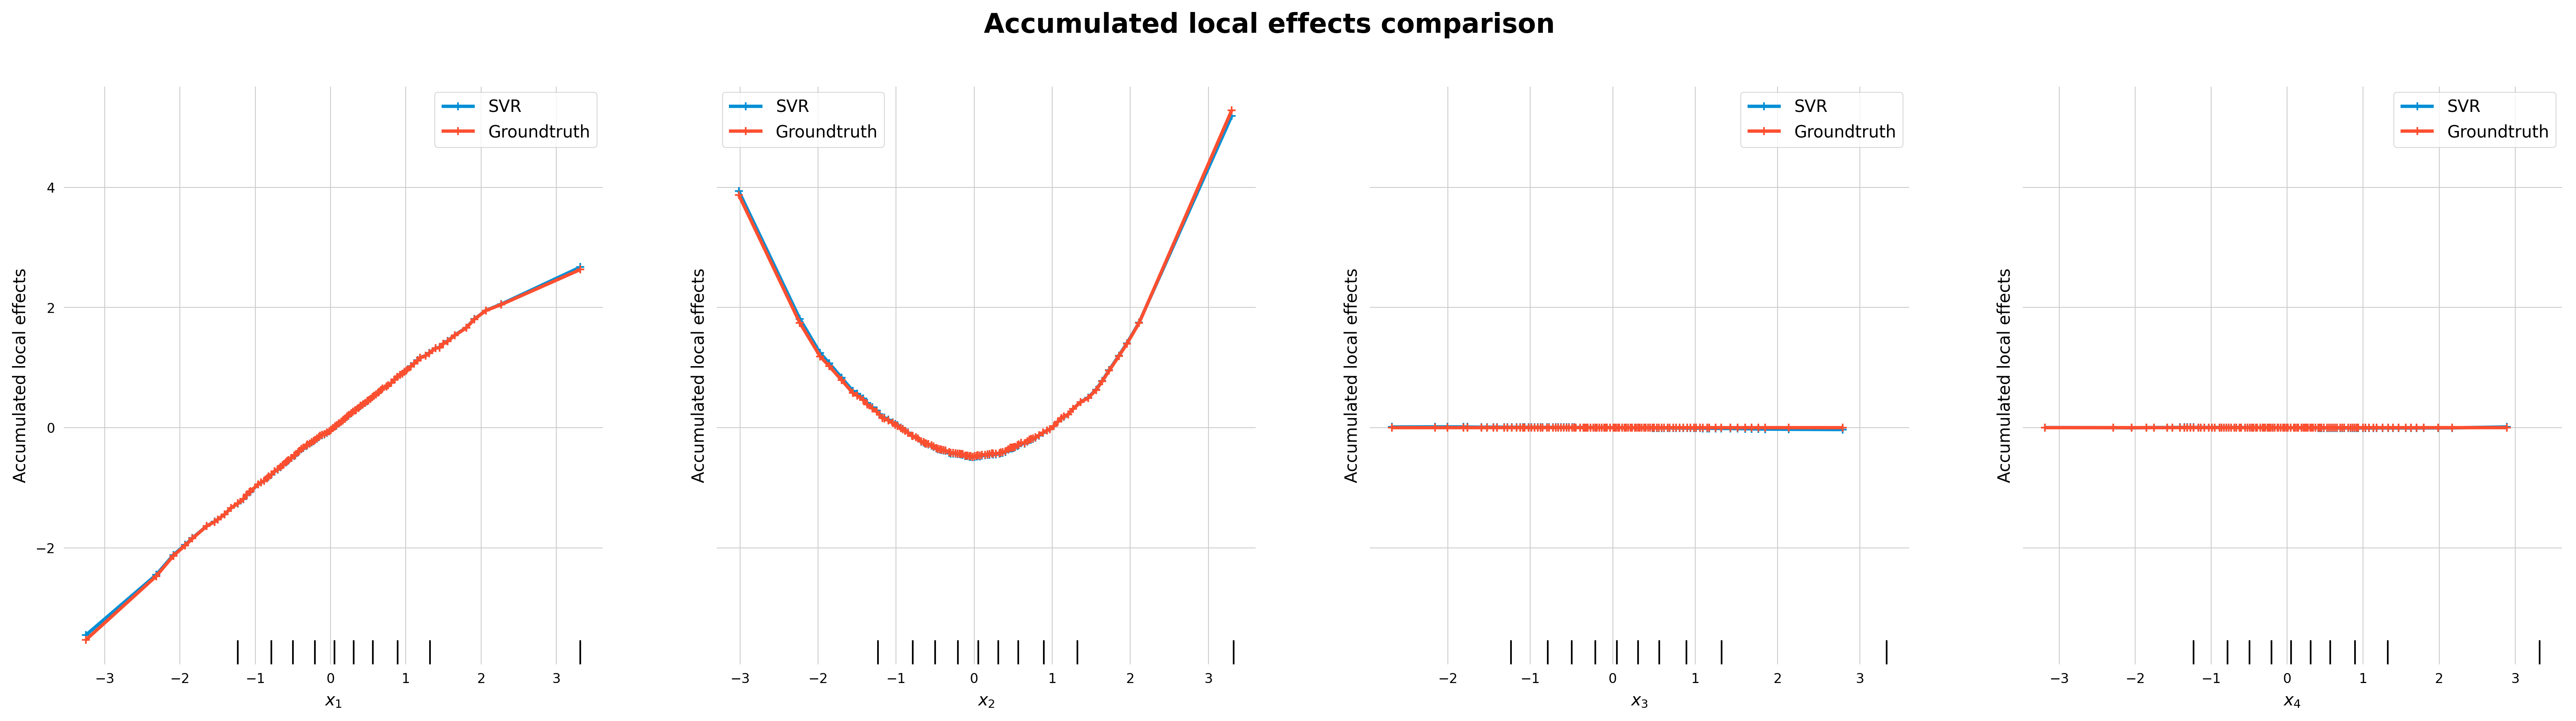

In [24]:
%matplotlib inline
plot_effect_comparison(svm, groundtruth, X_train, effect="ALE", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);